- Идентификатор заявки: SkillFactory_Id
- Дата рождения: BirthDate
- Адрес проживания: -
- Исключен из расчета
- Образование: education
- Тип занятости: employment status
- Стаж работы: Value
- Дата начала работы: JobStartDate
- Должность: Position
- Рабочий телефон: -
- Исключен из расчета
- Ежемесячный доход: MonthProfit
- Ежемесячный расход: MonthExpense
- Пол: Gender
    - Значения: 0 = М, 1 = Ж
- Семейное положение: Family status
- Кол-во детей младше 18 лет: ChildCount
- СНИЛС: SNILS
    - Значения: 0 = не указан в анкете, 1 = указан
- Параметры заказа
    - Сумма заказа: Loan_amount
    - Срок кредита: Loan_term
    - Категория товара: Goods_category
    - Код магазина: Merch_code
- Решение банка А: BankA_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошику
- Решение банка B: BankB_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка C: BankC_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка D: BankD_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку
- Решение банка E: BankE_decision
    - Значения: denied = отказ банка по заявке, success = одобрение банком заявки, error = банк вернул ошибку



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('SF_Mandarin_dataset_ver3.csv', sep=';', index_col=0)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BirthDate          6603 non-null   object 
 1   education          6603 non-null   object 
 2   employment status  6603 non-null   object 
 3   Value              6523 non-null   object 
 4   JobStartDate       6494 non-null   object 
 5   Position           6494 non-null   object 
 6   MonthProfit        6603 non-null   float64
 7   MonthExpense       6603 non-null   float64
 8   Gender             6566 non-null   float64
 9   Family status      6566 non-null   object 
 10  ChildCount         6566 non-null   float64
 11  SNILS              6603 non-null   float64
 12  BankA_decision     6603 non-null   object 
 13  BankB_decision     6603 non-null   object 
 14  BankC_decision     6603 non-null   object 
 15  BankD_decision     6603 non-null   object 
 16  BankE_decision     6603 non-

In [38]:
df.dropna(inplace=True)


In [39]:
df.index = df.index.astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BirthDate          6464 non-null   object 
 1   education          6464 non-null   object 
 2   employment status  6464 non-null   object 
 3   Value              6464 non-null   object 
 4   JobStartDate       6464 non-null   object 
 5   Position           6464 non-null   object 
 6   MonthProfit        6464 non-null   float64
 7   MonthExpense       6464 non-null   float64
 8   Gender             6464 non-null   float64
 9   Family status      6464 non-null   object 
 10  ChildCount         6464 non-null   float64
 11  SNILS              6464 non-null   float64
 12  BankA_decision     6464 non-null   object 
 13  BankB_decision     6464 non-null   object 
 14  BankC_decision     6464 non-null   object 
 15  BankD_decision     6464 non-null   object 
 16  BankE_decision     6464 non-n

In [41]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
2,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
3,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
4,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
5,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,Никогда в браке не состоял(а),...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture


In [42]:
df['Merch_code'].max()

80.0

In [43]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])

In [44]:
df['MonthProfit'] = df['MonthProfit'].astype('UInt64')
df['MonthExpense'] = df['MonthExpense'].astype('UInt64')
df['Loan_amount'] = df['Loan_amount'].astype('UInt64')


In [45]:
df['SNILS'] = df['SNILS'].round().astype('UInt8')
df['Gender'] = df['Gender'].round().astype('UInt8')
df['Merch_code'] = df['Merch_code'].astype('UInt8')
df['ChildCount'] = df['ChildCount'].astype('UInt8')
df['Loan_term'] = df['Loan_term'].astype('UInt8')

In [46]:
df['SNILS'] = df['SNILS'].round().astype('category')
df['Gender'] = df['Gender'].round().astype('category')
df['education'] = df['education'].astype('category')

In [47]:
df['BankA_decision'] = df['BankA_decision'].astype('category')
df['BankB_decision'] = df['BankB_decision'].astype('category')
df['BankC_decision'] = df['BankC_decision'].astype('category')
df['BankD_decision'] = df['BankD_decision'].astype('category')
df['BankE_decision'] = df['BankE_decision'].astype('category')
df['Family status'] = df['Family status'].astype('category')
df['Goods_category'] = df['Goods_category'].astype('category')

In [48]:
df['Position'] = df['Position'].str.lower()


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1 to 8787
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6464 non-null   datetime64[ns]
 1   education          6464 non-null   category      
 2   employment status  6464 non-null   object        
 3   Value              6464 non-null   object        
 4   JobStartDate       6464 non-null   datetime64[ns]
 5   Position           6464 non-null   object        
 6   MonthProfit        6464 non-null   UInt64        
 7   MonthExpense       6464 non-null   UInt64        
 8   Gender             6464 non-null   category      
 9   Family status      6464 non-null   category      
 10  ChildCount         6464 non-null   UInt8         
 11  SNILS              6464 non-null   category      
 12  BankA_decision     6464 non-null   category      
 13  BankB_decision     6464 non-null   category      
 14  BankC_decisio

In [50]:
df.head()

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,,,,,,
1,1988-07-21,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01,начальник п,180000,90000,0,Никогда в браке не состоял(а),...,0,success,success,success,success,denied,77,137000,18,Furniture
2,1998-01-16,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01,директор,200000,60000,0,Никогда в браке не состоял(а),...,0,success,denied,success,denied,success,27,33000,6,Fitness
3,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,denied,denied,success,success,success,19,165000,24,Medical_services
4,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,34,67000,12,Education
5,1972-10-02,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01,директор,300000,45000,1,Никогда в браке не состоял(а),...,0,success,denied,success,success,success,75,36000,6,Furniture


In [51]:
summary_stats = df.describe()
print(summary_stats)

                           BirthDate                   JobStartDate  \
count                           6464                           6464   
mean   1987-02-03 21:57:55.247524800  2015-10-15 19:19:45.148514816   
min              1940-03-22 00:00:00            1973-09-01 00:00:00   
25%              1979-01-05 00:00:00            2012-09-01 00:00:00   
50%              1988-01-10 00:00:00            2018-09-01 00:00:00   
75%              1997-11-01 06:00:00            2021-04-01 00:00:00   
max              2005-05-27 00:00:00            2023-06-01 00:00:00   
std                              NaN                            NaN   

         MonthProfit  MonthExpense  ChildCount  Merch_code   Loan_amount  \
count         6464.0        6464.0      6464.0      6464.0        6464.0   
mean   149521.575959  25739.983137    0.090037   38.787593  76153.155941   
min             50.0           0.0         0.0         1.0        4000.0   
25%         100000.0       15000.0         0.0        18

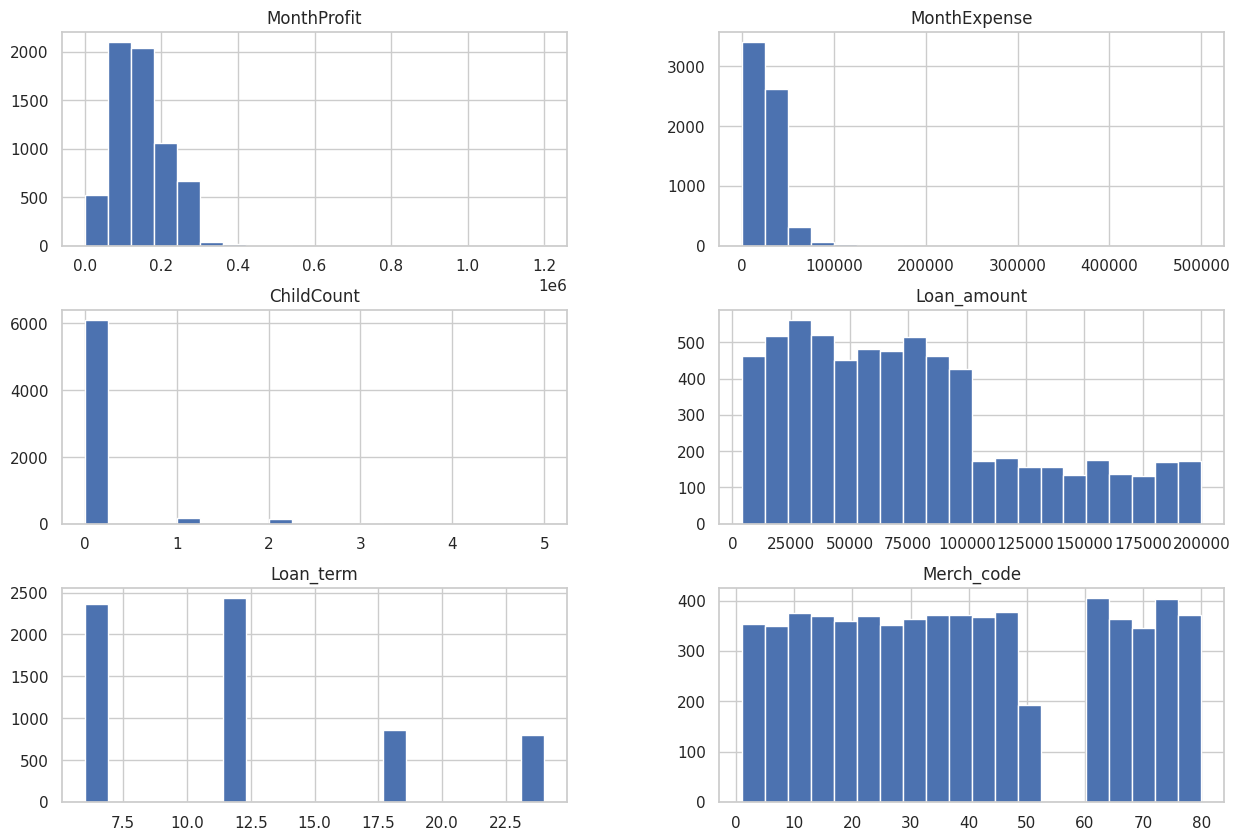

In [52]:
# Plot histograms for numeric variables
numeric_vars = ['MonthProfit', 'MonthExpense', 'ChildCount', 'SNILS', 'Loan_amount', 'Loan_term', 'Merch_code']
df[numeric_vars].hist(bins=20, figsize=(15, 10))
plt.show()

In [53]:
df[df['ChildCount'] > 0].count()

BirthDate            362
education            362
employment status    362
Value                362
JobStartDate         362
Position             362
MonthProfit          362
MonthExpense         362
Gender               362
Family status        362
ChildCount           362
SNILS                362
BankA_decision       362
BankB_decision       362
BankC_decision       362
BankD_decision       362
BankE_decision       362
Merch_code           362
Loan_amount          362
Loan_term            362
Goods_category       362
dtype: int64

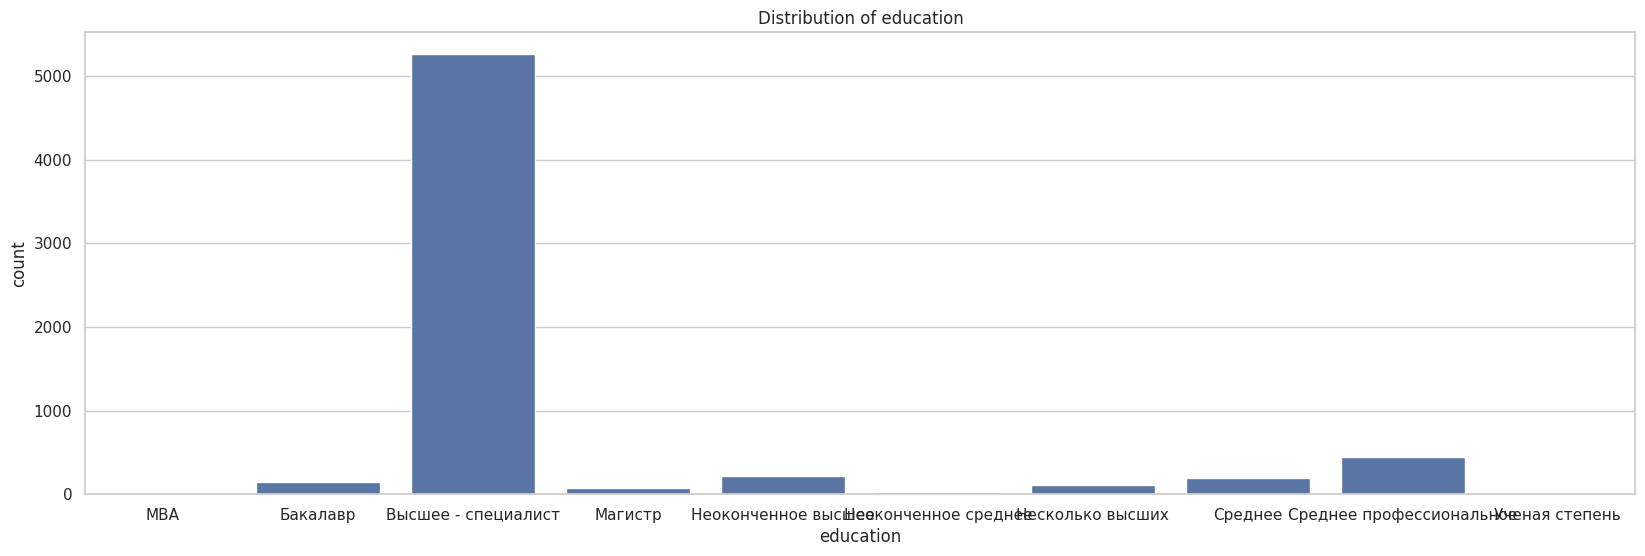

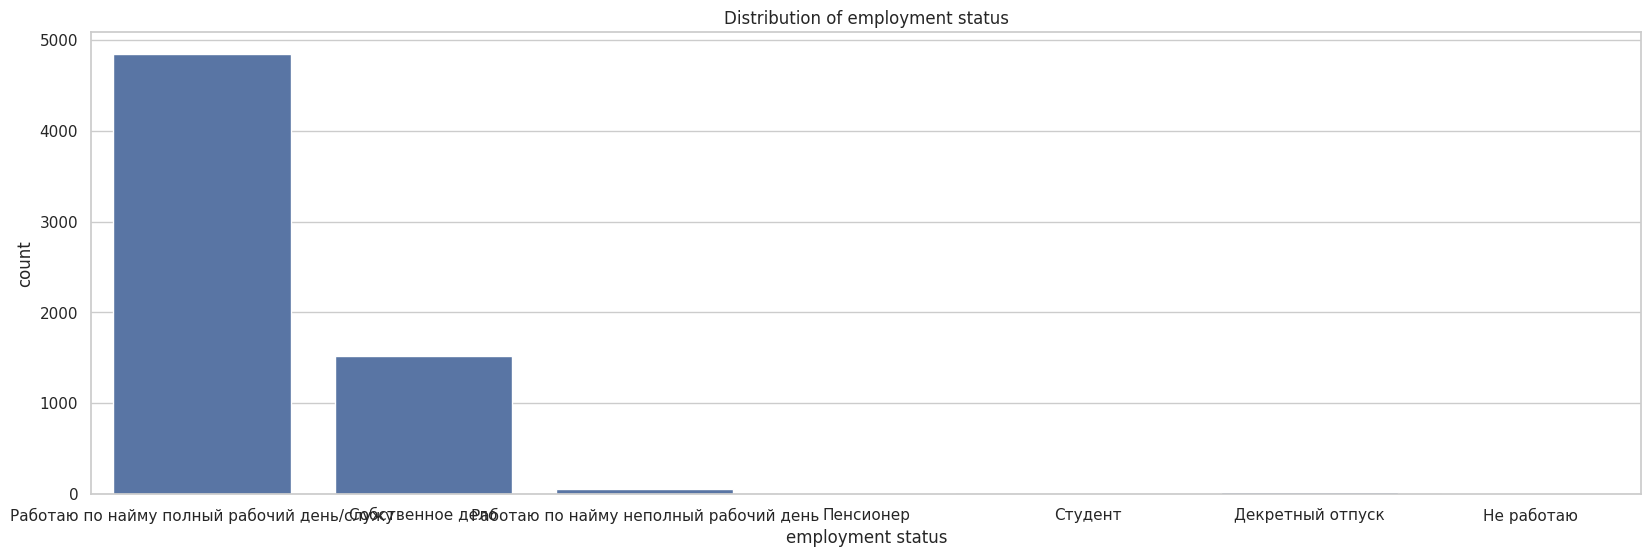

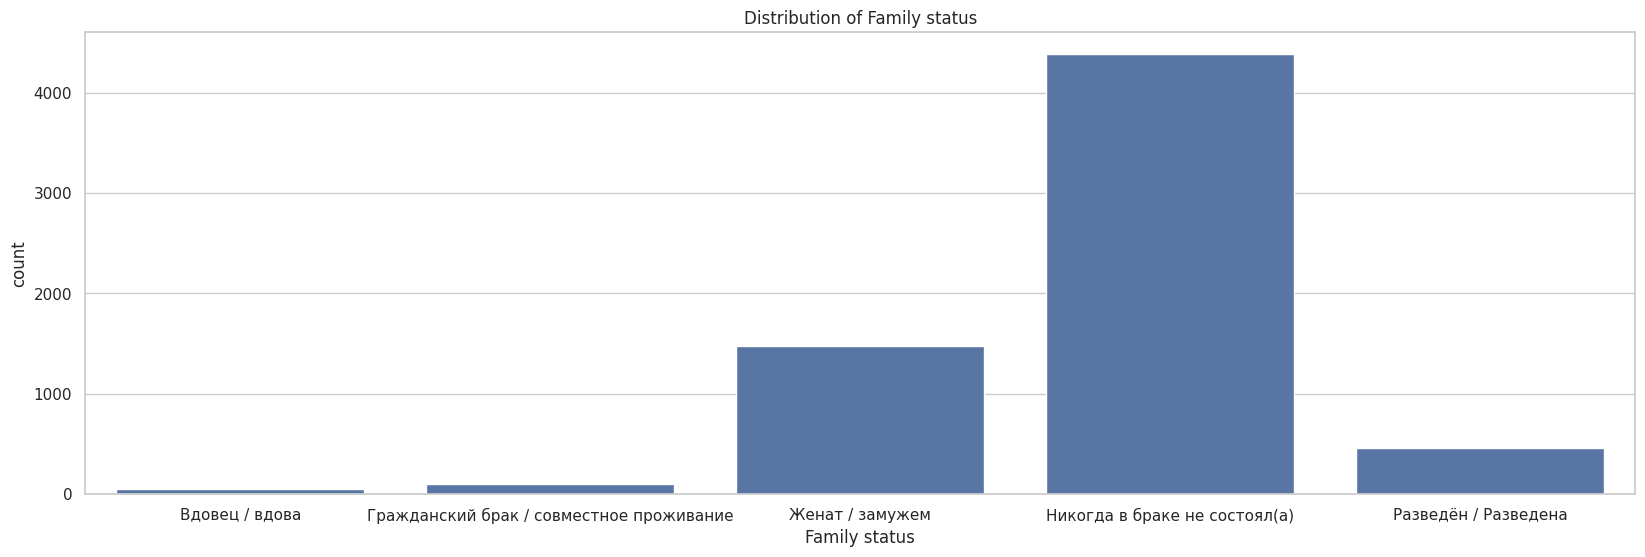

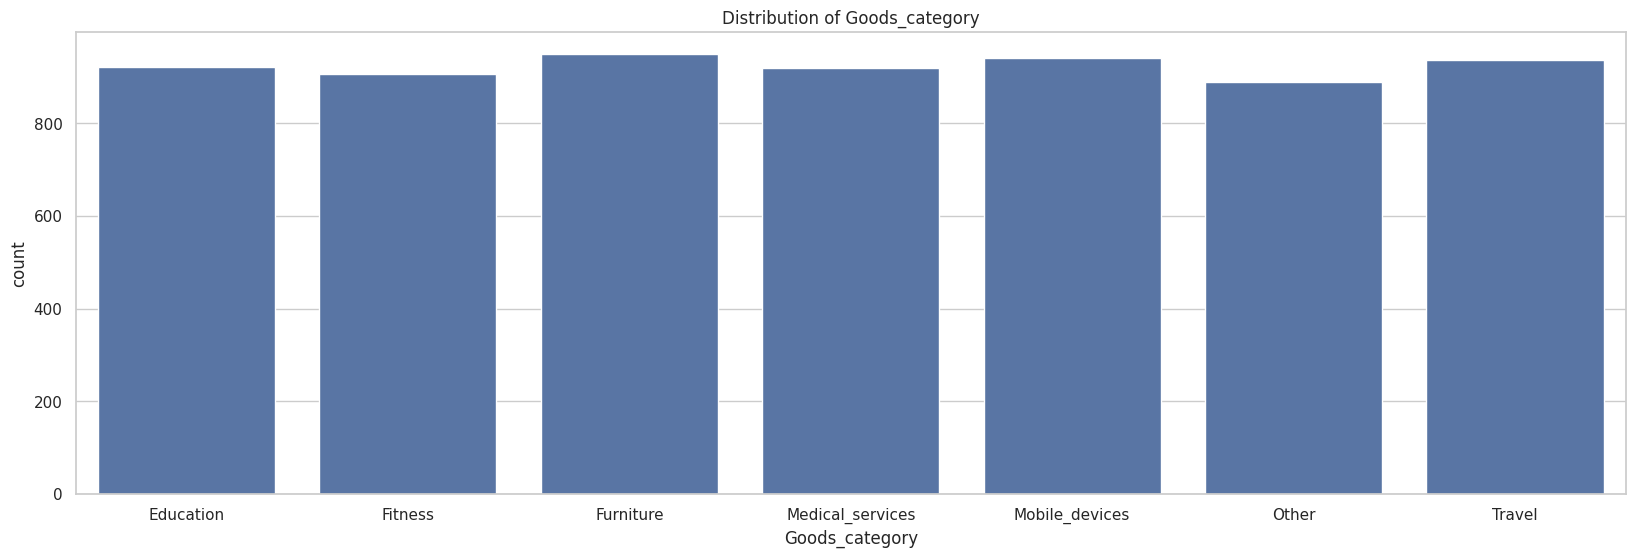

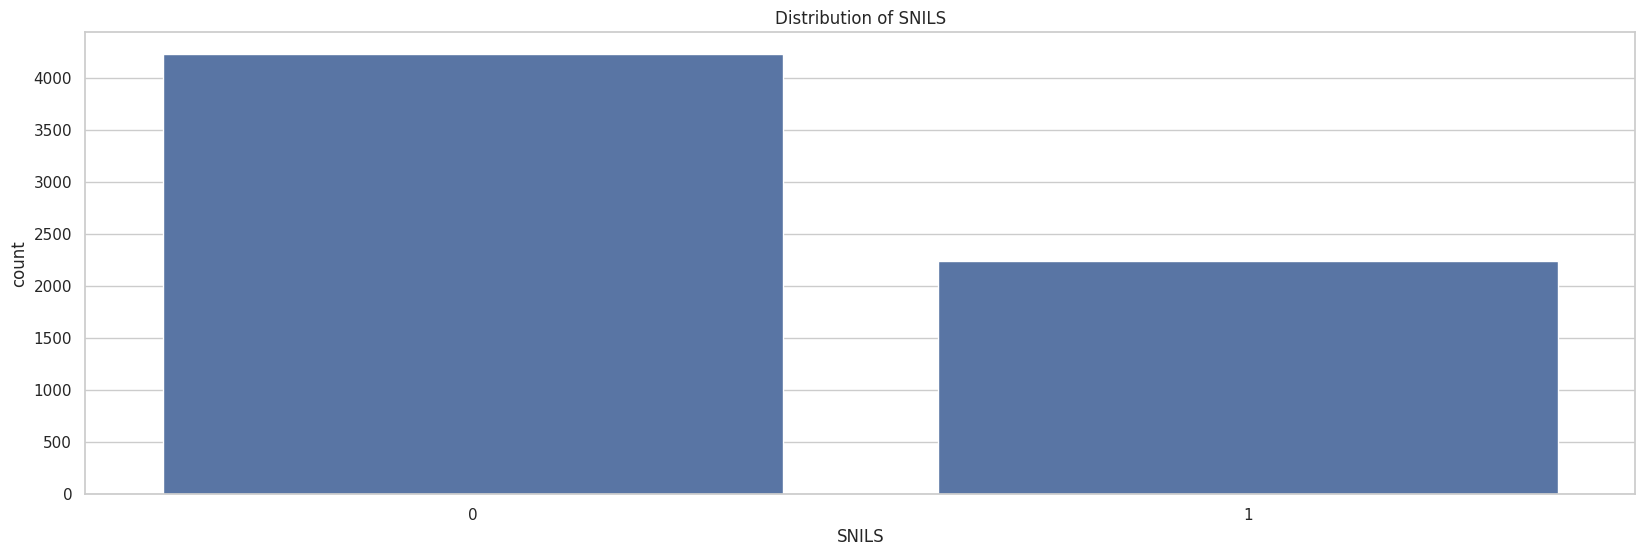

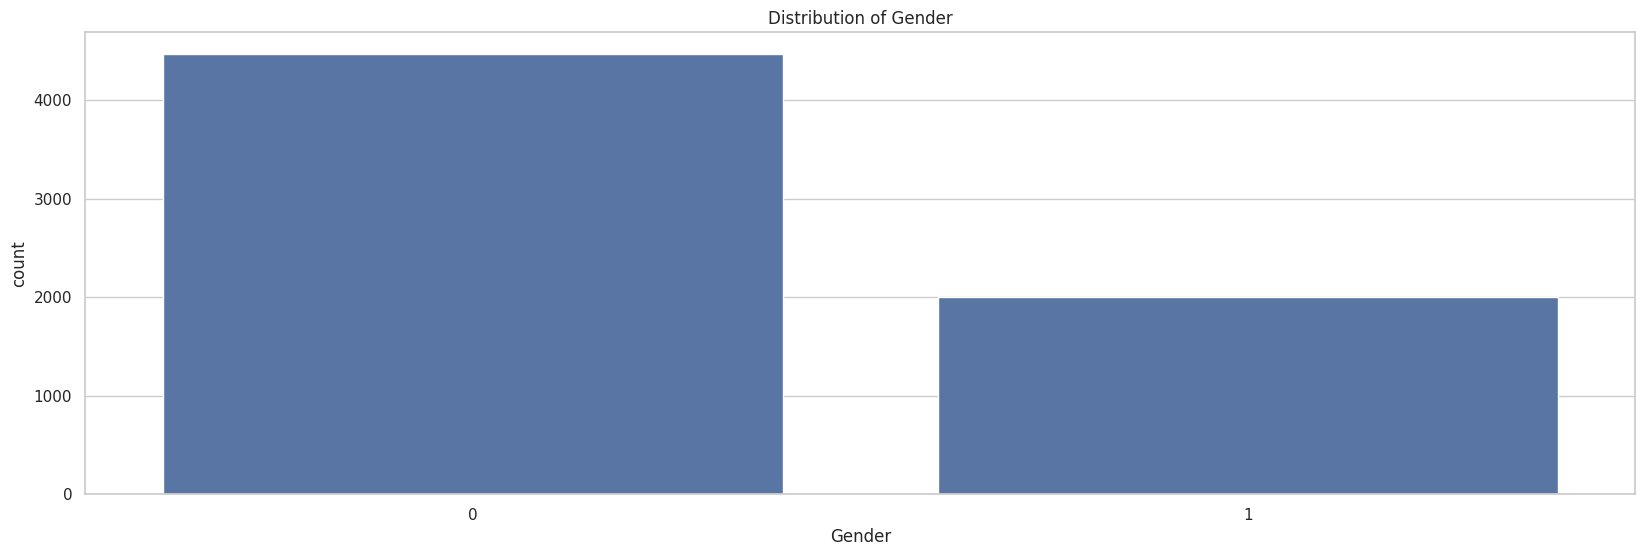

In [63]:
# Explore categorical variables
cat_vars = ['education', 'employment status', 'Family status', 'Goods_category', 'SNILS', 'Gender']
for var in cat_vars:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

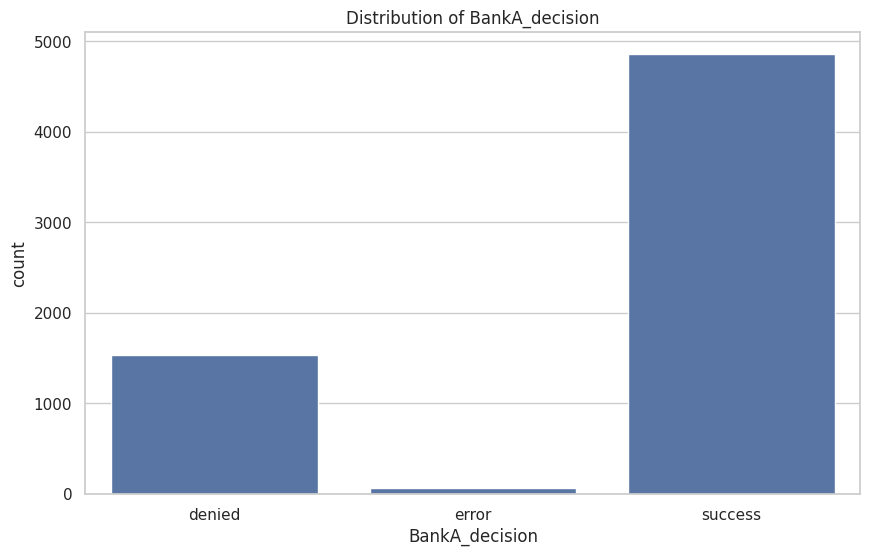

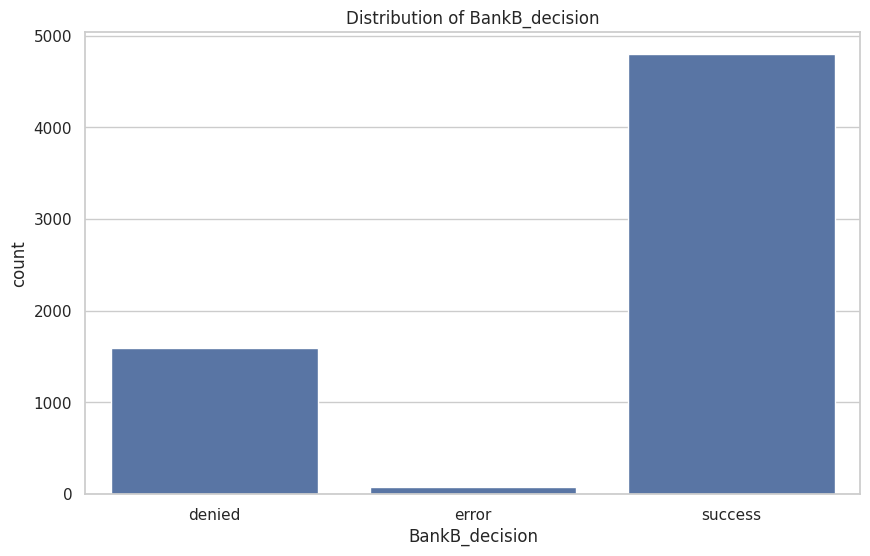

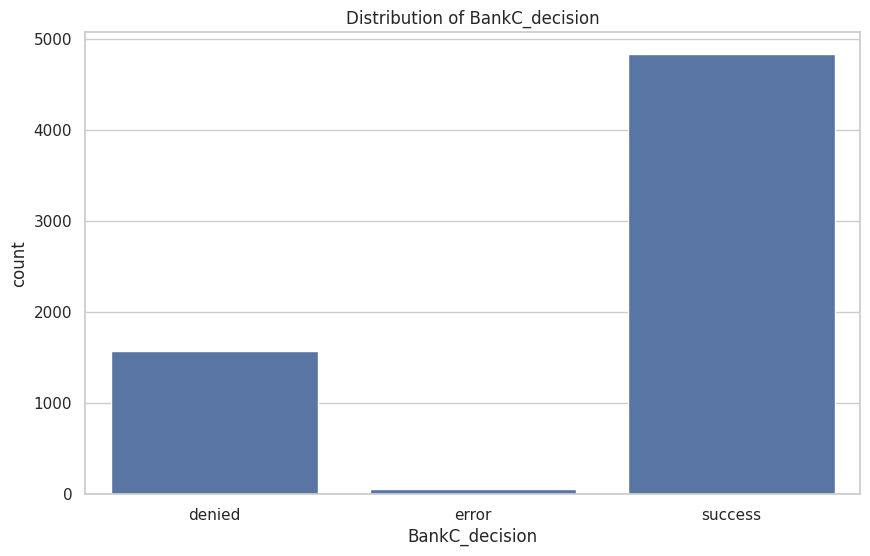

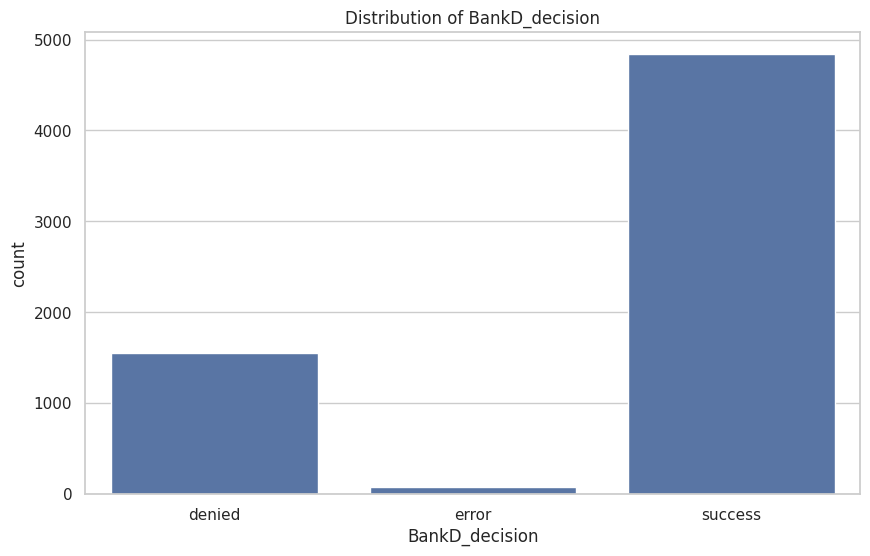

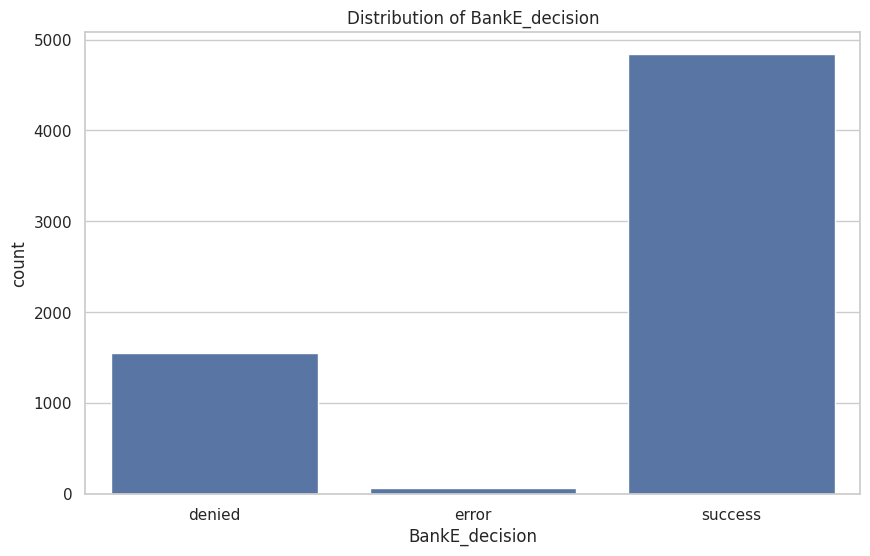

In [55]:
# Explore bank decisions
bank_decision = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']
for bank in bank_decision:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=bank, data=df)
    plt.title(f'Distribution of {bank}')
    plt.show()

In [56]:
# List of bank decision columns
bank_decision_columns = ['BankA_decision', 'BankB_decision', 'BankC_decision', 'BankD_decision', 'BankE_decision']

# Create a new column 'Overall_decision' with the overall decision for each row
df['Overall_decision'] = df[bank_decision_columns].apply(lambda row: 'success' if 'success' in row.values else 'denied', axis=1)

# Count the overall decisions
overall_decision_count = df['Overall_decision'].value_counts()

# Display the results
print("Overall Bank Decisions:")
print(overall_decision_count)

Overall Bank Decisions:
Overall_decision
success    6456
denied        8
Name: count, dtype: int64


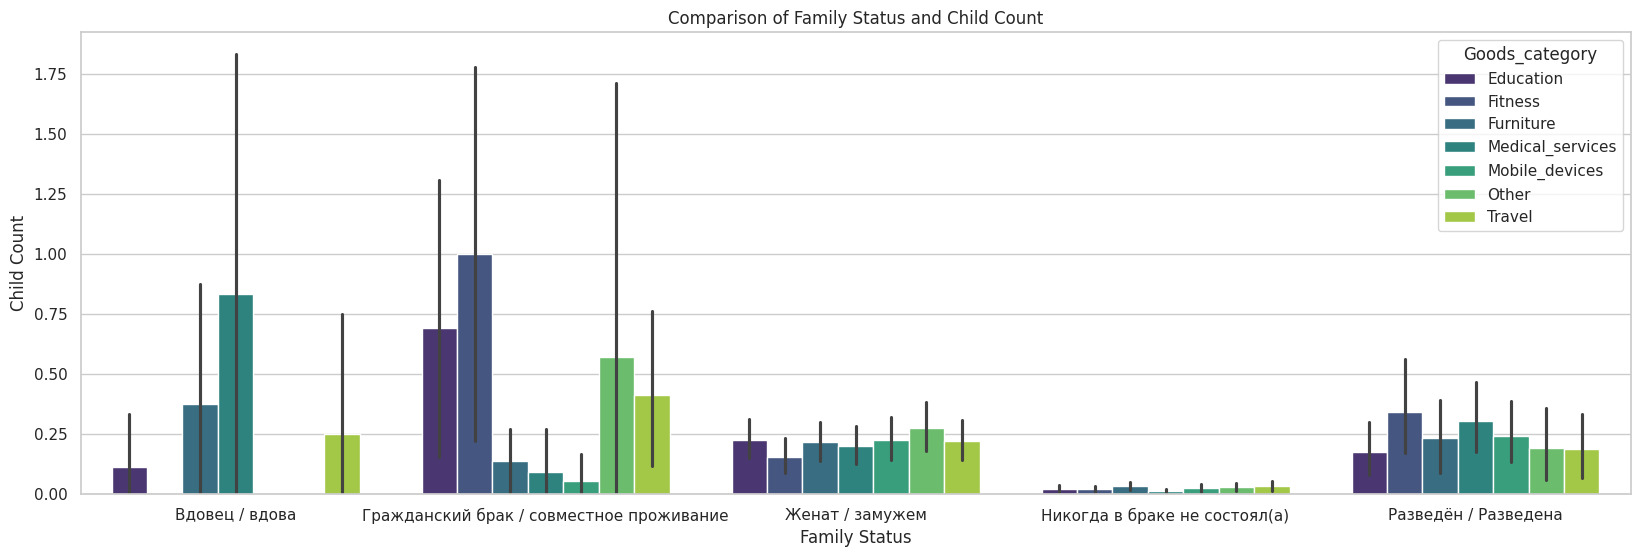

In [67]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot comparing 'Family status' with 'ChildCount'
plt.figure(figsize=(20, 6))
sns.barplot(x='Family status', y='ChildCount', data=df, palette='viridis', hue='Goods_category')
plt.title('Comparison of Family Status and Child Count')
plt.xlabel('Family Status')
plt.ylabel('Child Count')
plt.show()

In [57]:
df['Remained'] = df['MonthProfit'] - df['MonthExpense']

In [58]:
df['Remained'].sample(10)

SkillFactory_Id
2664    100000
3772    110000
7649     34000
6070     25000
306     163000
4963    138000
6396    220000
4710     50000
3287     68000
5870    210000
Name: Remained, dtype: UInt64

In [59]:
df['MonthProfit'].describe()

count           6464.0
mean     149521.575959
std       76000.700594
min               50.0
25%           100000.0
50%           148000.0
75%           190000.0
max          1200000.0
Name: MonthProfit, dtype: Float64

In [60]:
df['MonthExpense'].describe()

count          6464.0
mean     25739.983137
std      20301.771239
min               0.0
25%           15000.0
50%           22500.0
75%           30000.0
max          500000.0
Name: MonthExpense, dtype: Float64

In [61]:
df['Remained'].describe()

count                    6464.0
mean        34245193206267752.0
std        794126654262366592.0
min                         0.0
25%                     80000.0
50%                    120000.0
75%                    160000.0
max      18446744073709541376.0
Name: Remained, dtype: Float64